<a href="https://colab.research.google.com/github/taraudani/finalproj/blob/main/Initial_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [4]:
aclr_orig = pd.read_csv('aclr_data.csv')

In [5]:
col_list = ['record_id', 'sex_dashboard', 'age', 'age_group', 'tss', 'tss_dashboard', 'ikdc', 'acl_rsi']
lsi_list = [col for col in aclr_orig.columns if 'lsi' in col and '_l' not in col]
final_list = col_list + lsi_list
aclr_used = aclr_orig[final_list]

In [6]:
aclr = aclr_used[final_list].copy()
aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
aclr['age_group'] = aclr.groupby('record_id')['age_group'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_24899/4209322551.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_24899/4209322551.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_24899/4209322551.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a futu

In [7]:
aclr['age_group'] = aclr['age_group'].astype('category')

In [8]:
aclr.head()

,record_id,sex_dashboard,age,age_group,tss,tss_dashboard,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60
0,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Male,21.7,5.0,13.7,13 to 24 months,95.4,87.5,92.73,NaN,NaN,87.86,103.32
2,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Female,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Female,14.5,2.0,7.6,5 to 7 months,79.3,8.3,NaN,NaN,NaN,45.00,72.98


## **Graphs:**

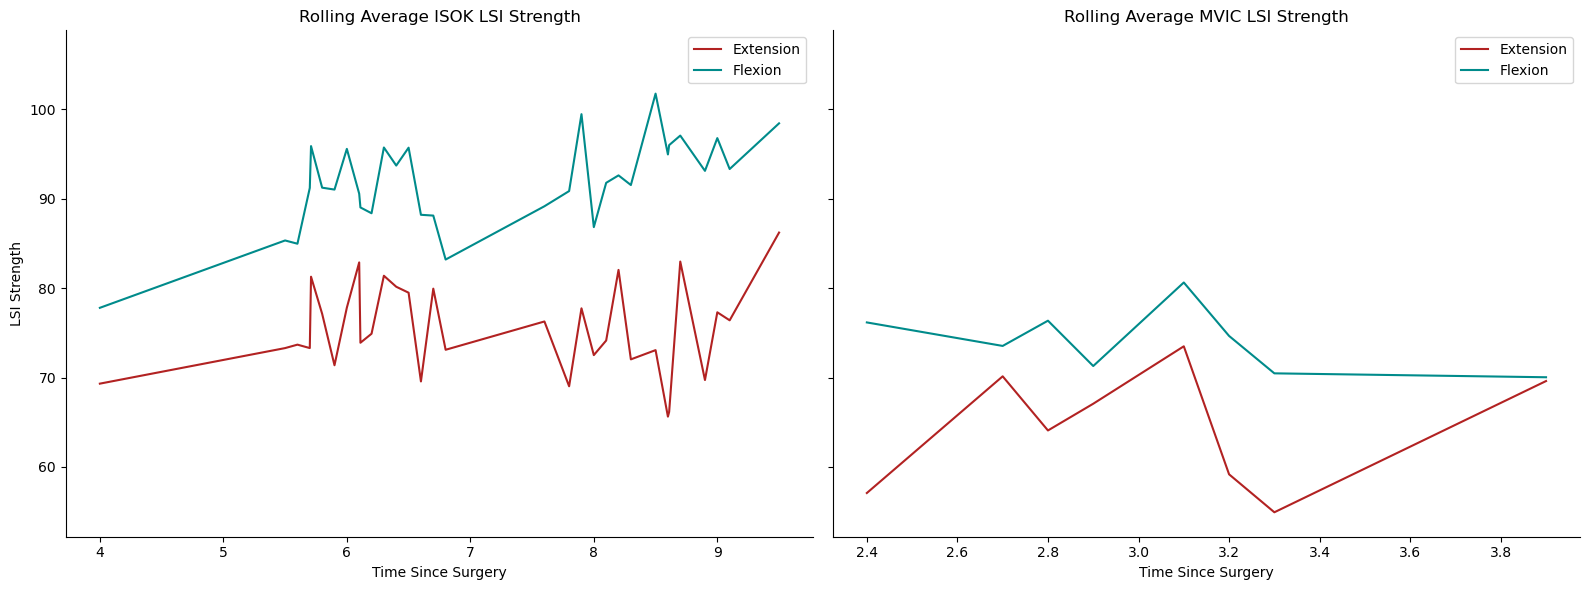

In [9]:
aclr = aclr.sort_values('tss')

aclr['ext_rolling'] = aclr['lsi_ext_isok_60'].rolling(window=12).mean()
aclr['flex_rolling'] = aclr['lsi_flex_isok_60'].rolling(window=12).mean()
aclr['ext_rolling_m'] = aclr['lsi_ext_mvic_60'].rolling(window=8).mean()
aclr['flex_rolling_m'] = aclr['lsi_flex_mvic_60'].rolling(window=8).mean()

all_vals = pd.concat([
    aclr['ext_rolling'], aclr['flex_rolling'],
    aclr['ext_rolling_m'], aclr['flex_rolling_m']
])
ymin, ymax = all_vals.min(), all_vals.max()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.lineplot(ax=axes[0], data=aclr, x='tss', y='ext_rolling', color='firebrick', label='Extension', errorbar=None)
sns.lineplot(ax=axes[0], data=aclr, x='tss', y='flex_rolling', color='darkcyan', label='Flexion', errorbar=None)
axes[0].set_title('Rolling Average ISOK LSI Strength')
axes[0].set_xlabel('Time Since Surgery')
axes[0].set_ylabel('LSI Strength')
axes[0].set_ylim(ymin, ymax)
axes[0].legend()
sns.despine(ax=axes[0])

sns.lineplot(ax=axes[1], data=aclr, x='tss', y='ext_rolling_m', color='firebrick', label='Extension', errorbar=None)
sns.lineplot(ax=axes[1], data=aclr, x='tss', y='flex_rolling_m', color='darkcyan', label='Flexion', errorbar=None)
axes[1].set_title('Rolling Average MVIC LSI Strength')
axes[1].set_xlabel('Time Since Surgery')
axes[1].set_ylim(ymin, ymax)
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

The graph above is meant to expose general patterns of flexion and extension strength over the course of recovery. It shows isokinetic and MVIC measurement methods side by side to account for their differences.

In [10]:
acl_grouped = aclr.groupby('tss_dashboard').agg(
    mean_ext_mvic=('lsi_ext_mvic_90', 'mean'),
    mean_ext_mvic_60=('lsi_ext_mvic_60', 'mean'),
    mean_flex_mvic=('lsi_flex_mvic_60', 'mean'),
    mean_ext_isok=('lsi_ext_isok_60', 'mean'),
    mean_flex_isok=('lsi_flex_isok_60', 'mean'),
    mean_ikdc=('ikdc', 'mean'),
    mean_acl_rsi=('acl_rsi', 'mean'),
).reset_index()

In [11]:
new_order = [1,2,3,0,4,5]
acl_grouped = acl_grouped.iloc[new_order]
acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped = acl_grouped.drop(index=[1,2,4,5])

acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped

,tss_dashboard,mean_ext_mvic,mean_ext_mvic_60,mean_flex_mvic,mean_ext_isok,mean_flex_isok,mean_ikdc,mean_acl_rsi
0,3 to 4 months,75.192971,69.291246,76.021983,63.093288,81.837862,69.329736,54.784712
1,13 to 24 months,95.530889,76.286429,78.357143,79.723066,96.363400,82.771023,65.636093


Text(0.9, 1, '13-24 months post-op')

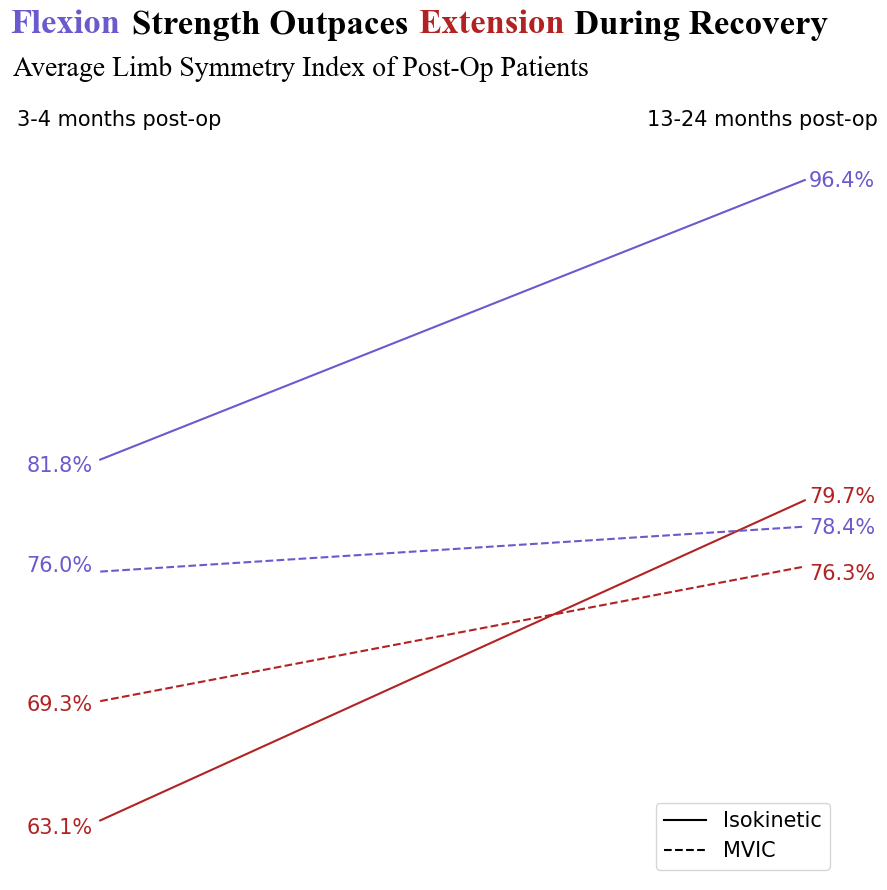

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

#graph slopes 
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_isok'], linestyle='-', color='firebrick', label ='Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_isok'], linestyle='-', color='slateblue', label ='Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_mvic'], linestyle='--', color='slateblue', label ='MVIC')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_mvic_60'], linestyle='--', color='firebrick', label ='MVIC')

#remove unnecessary scaffolding
ax.set_ylim(60,100)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xticks([])
ax.set_xlabel('')
sns.despine(top=True, right=True, left=True, bottom=True)

#add a legend for line type
custom_legend = [
    Line2D([0], [0], color='black', linestyle='-', label='Isokinetic'),
    Line2D([0], [0], color='black', linestyle='--', label='MVIC')
]
ax.legend(handles = custom_legend, loc='lower right', fontsize=15)

#add color coded title
plt.text(0, 1.13, 'Flexion', ha='center', va='top', fontsize=25, color='slateblue', font = 'Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.265, 1.13, 'Strength Outpaces', ha='center', va='top', fontsize=25, font = 'Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.55, 1.13, 'Extension', ha='center', va='top', fontsize=25, color='firebrick', font = 'Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.82, 1.13, 'During Recovery', ha='center', va='top', fontsize=25, font = 'Times New Roman', fontweight='bold', transform=ax.transAxes)

#add a subtitle
plt.text(-0.067, 1.07, 'Average Limb Symmetry Index of Post-Op Patients', ha='left', va='top', fontsize=20, font = 'Times New Roman', transform=ax.transAxes)

#label lthe lines
plt.text(-0.05, 0.53, '81.8%',color='slateblue', fontsize = 15, transform=ax.transAxes)
plt.text(0.96, 0.9, '96.4%', color='slateblue', fontsize = 15, transform=ax.transAxes)

plt.text(-0.05, 0.4, '76.0%', color='slateblue', fontsize = 15, transform=ax.transAxes)
plt.text(0.96, 0.45, '78.4%', color='slateblue', fontsize = 15, transform=ax.transAxes)

plt.text(-0.05, 0.06, '63.1%', color='firebrick', fontsize = 15, transform=ax.transAxes)
plt.text(0.96, 0.49, '79.7%', color='firebrick', fontsize = 15, transform=ax.transAxes)

plt.text(-0.05, 0.22, '69.3%', color='firebrick', fontsize = 15, transform=ax.transAxes)
plt.text(0.96, 0.39, '76.3%', color='firebrick', fontsize = 15, transform=ax.transAxes)

#label axes
plt.text(0.07,1, "3-4 months post-op", ha='center', va='top', fontsize=15, transform=ax.transAxes)
plt.text(0.9,1, "13-24 months post-op", ha='center', va='top', fontsize=15, transform=ax.transAxes)



This graph is meant to expose how flexion, both at the beginning and far into recovery, is better off than extension. Seeing that both are vital functions of the knee, this graph suggests that extra attention should be paid to extension during recovery.

#### see the relationship between flexion strength and psychological readiness

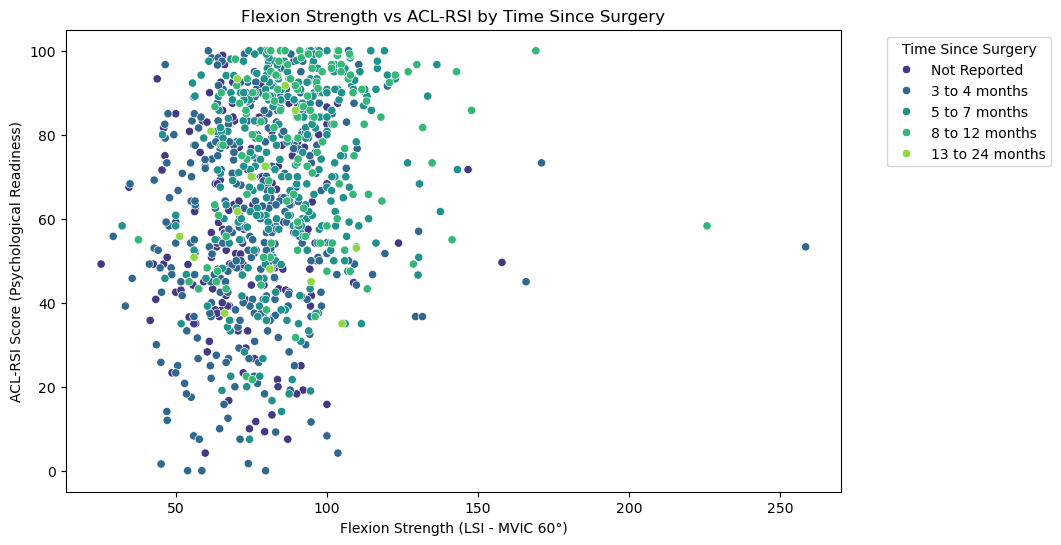

In [15]:
df_plot = aclr[['tss_dashboard', 'lsi_flex_mvic_60', 'acl_rsi']].dropna()

#make a scatterplot to explore the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='lsi_flex_mvic_60', y='acl_rsi', hue='tss_dashboard', palette='viridis')
plt.title("Flexion Strength vs ACL-RSI by Time Since Surgery")
plt.xlabel("Flexion Strength (LSI - MVIC 60°)")
plt.ylabel("ACL-RSI Score (Psychological Readiness)")
plt.legend(title="Time Since Surgery", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


This graph is meant to look at the relationship between flexion strength and psychological readiness. The correlation does not look very strong, meaning that if primarily concerned with psychological readiness, flexion is not a doctor's most relevant focus.